<a href="https://colab.research.google.com/github/mayank1365/Yulu_Case_Study/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Data types conversions. Statistical summary, missing value detection.

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


This data seems to have no null values.

Here Holiday data is included in the workingday column.

Casual and Registered is summed to counts column.

Also, temp and atemp gives us the similar info.

So we can ignore these columns - holiday,casual,registered,temp.

We can do hypothesis testing to see which factor has effects to Counts.

Let's consider 95% confidence interval. But first let's view the distributions.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Datatype of following attributes needs to changed to proper data type -**
* datetime - to datetime

* season - to categorical
* holiday - to categorical
* workingday - to categorical
* weather - to categorical

In [31]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [21]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [34]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

This shows there are no null values.

# Univariate Analysis

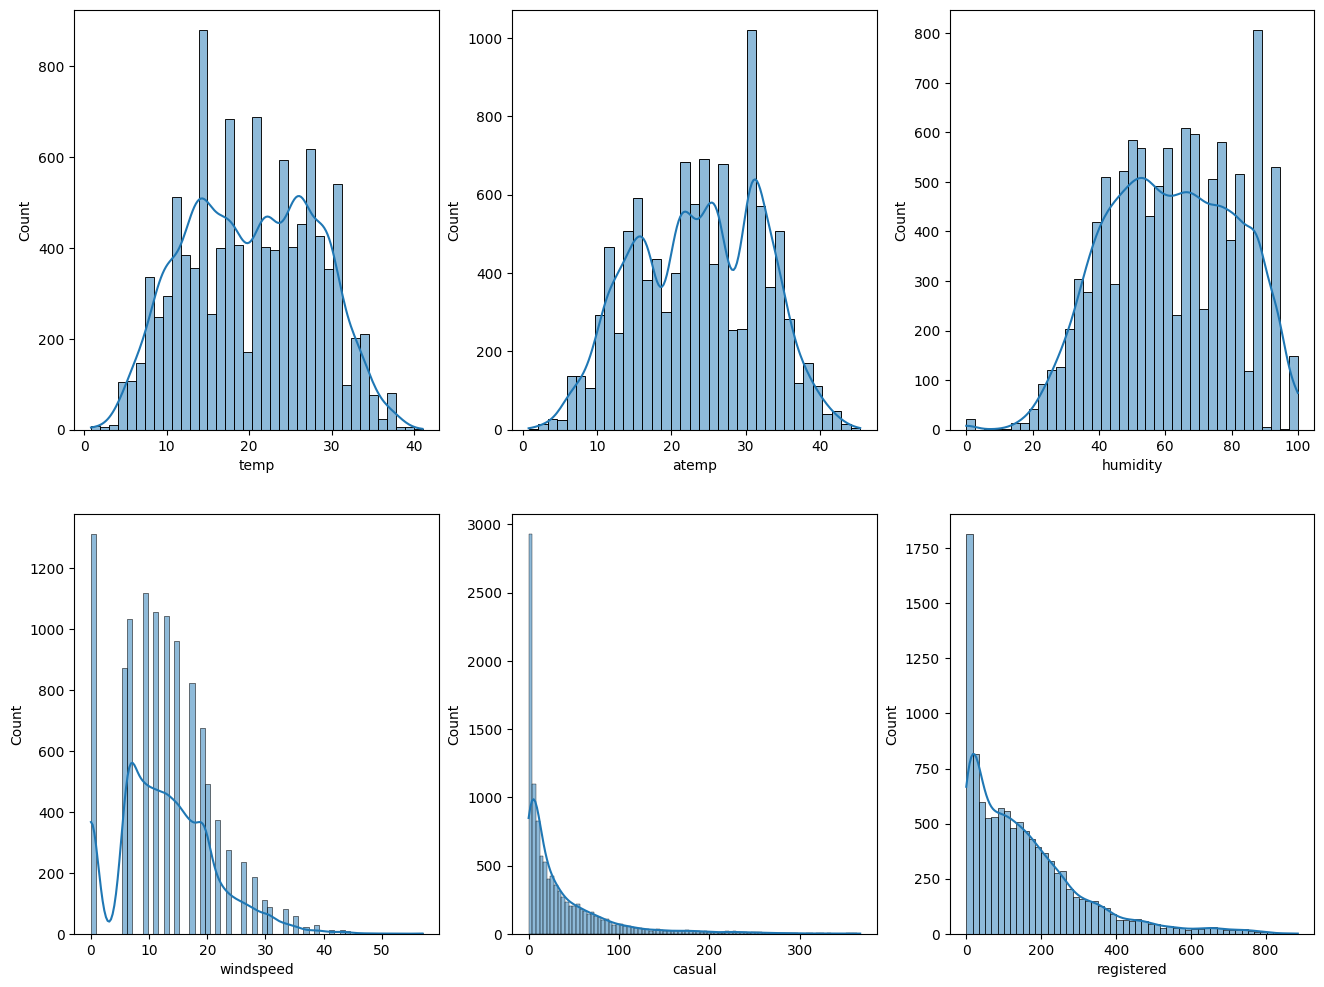

In [35]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig,axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_col[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()

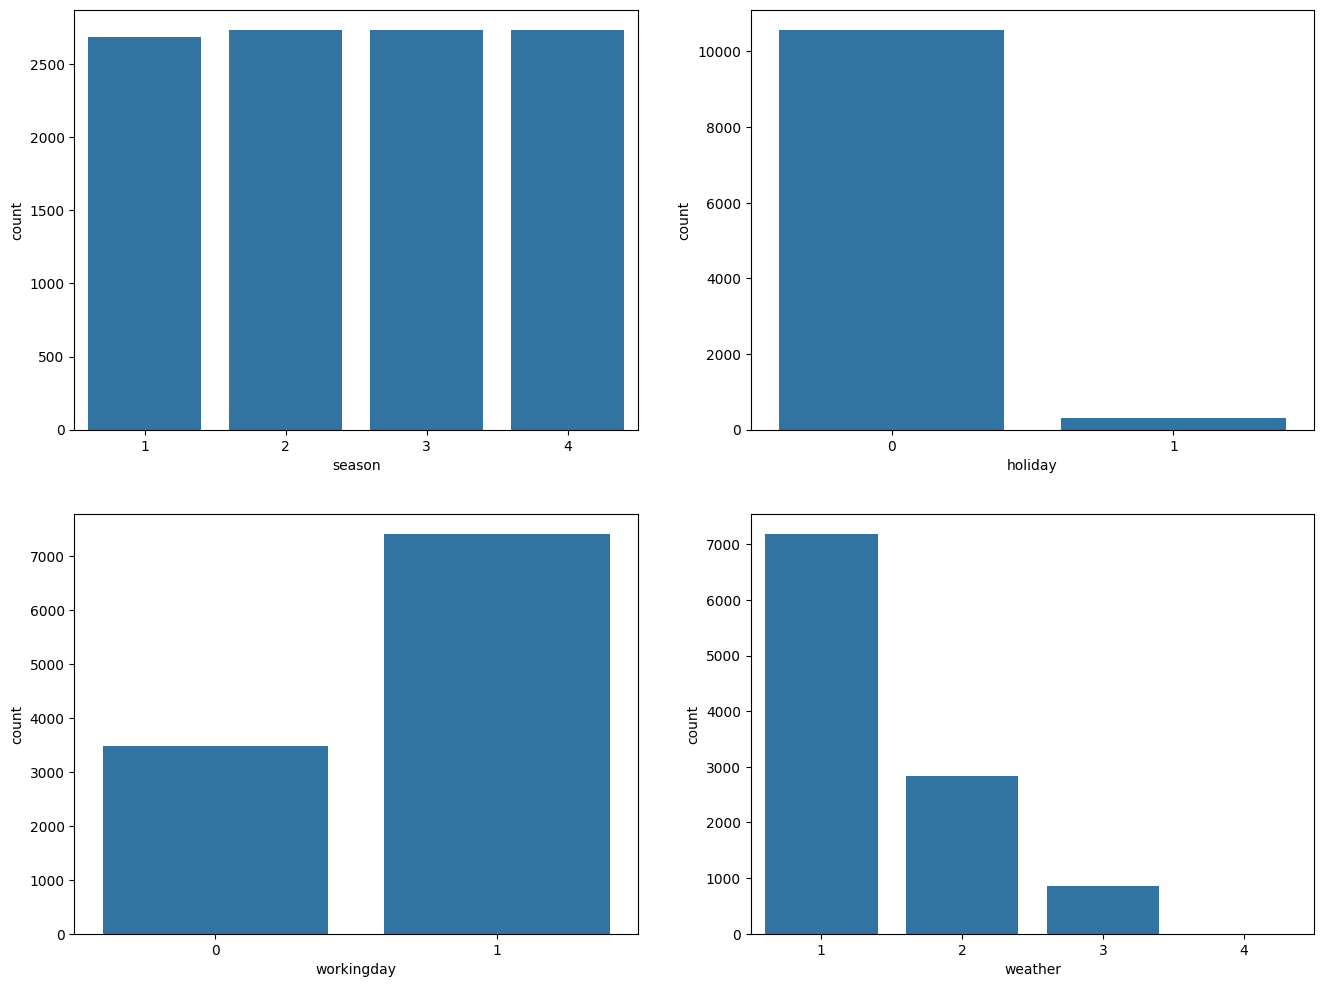

In [29]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

The above line shows univariate for categorical variable using countplot.

In [36]:
df['datetime'].value_counts()

datetime
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: count, Length: 10886, dtype: int64

In [37]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [38]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [39]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [40]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [41]:
df['temp'].value_counts()

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: count, dtype: int64

# Bi-Variate Analysis

In [42]:
df.corr()['count']

datetime      0.310187
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

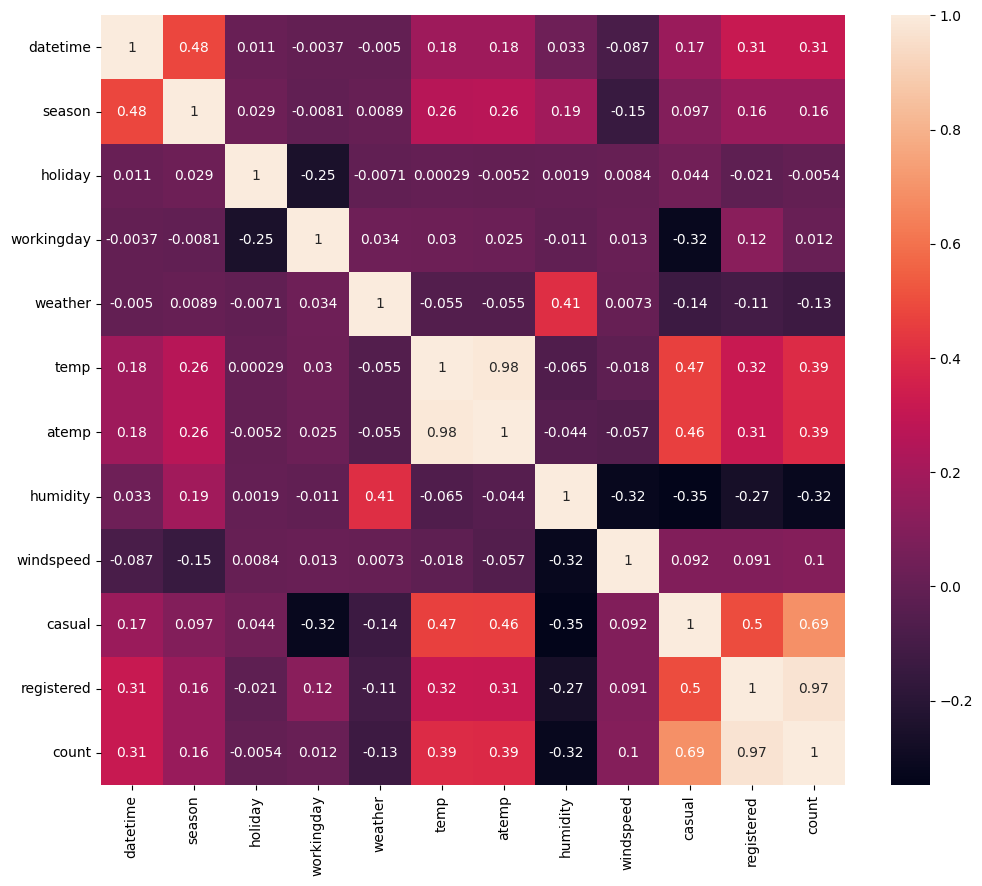

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Here, count column seems to have positive correlation with atemp and and negative with humidity. Although they are around only 30-40%. But we can see people go out with bike more when the temp is high and humidity is low. Seems within expectations.

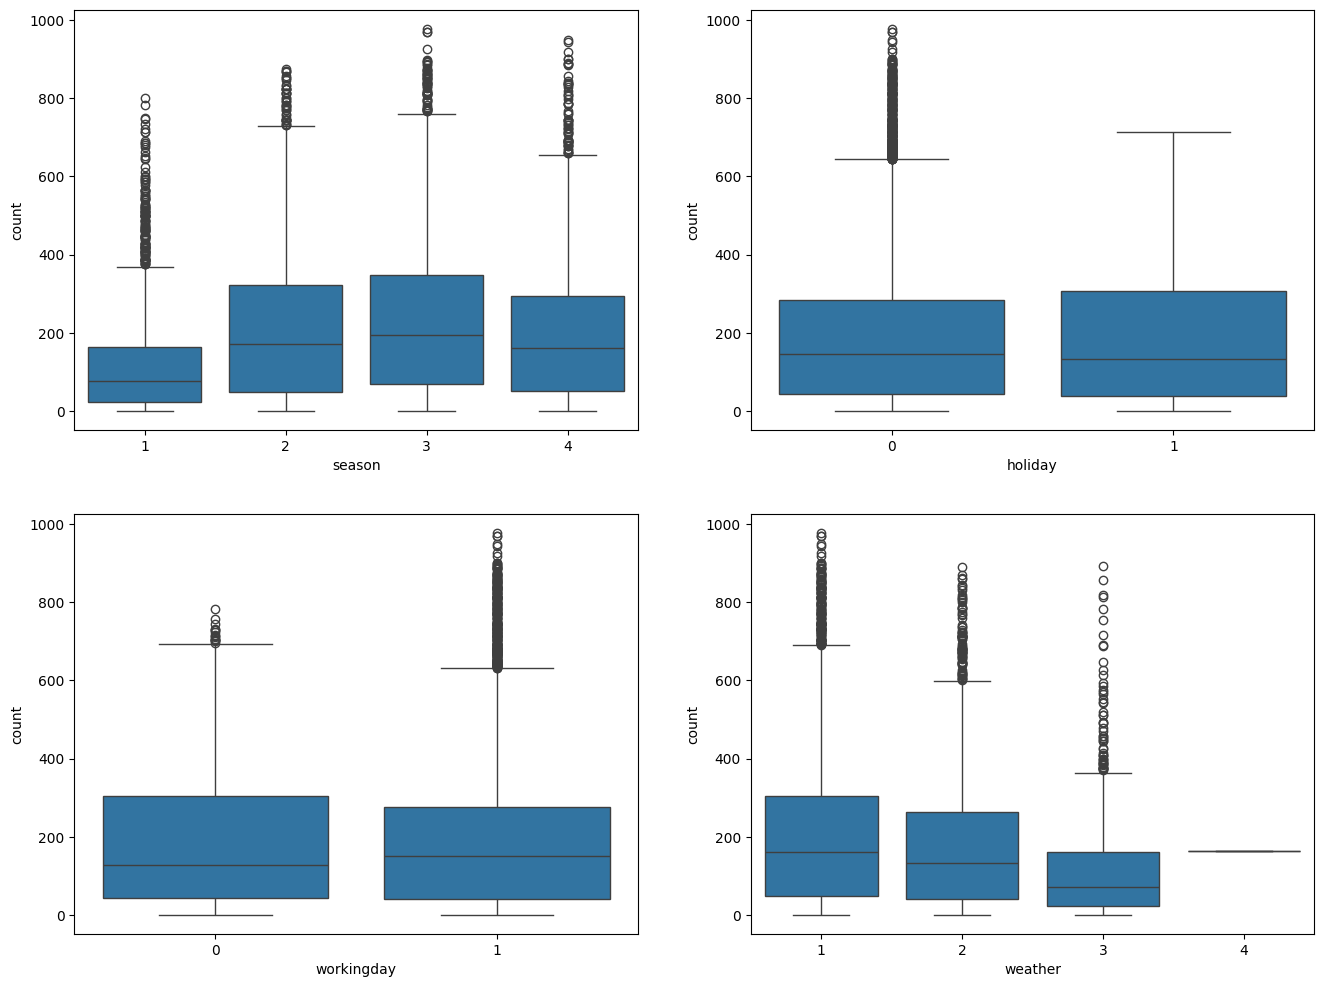

In [46]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

# Hypothesis Testing

## Test - 1

Null Hypothesis (H0): Weather is independent of the season


Alternate Hypothesis (H1): Weather is not independent of the season


Significance level (alpha): 0.05


We will use chi-square test to test hypyothesis defined above.

In [56]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [57]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [59]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


## Test - 2


Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

The following line does hypothesis testing 2 sample ttest.

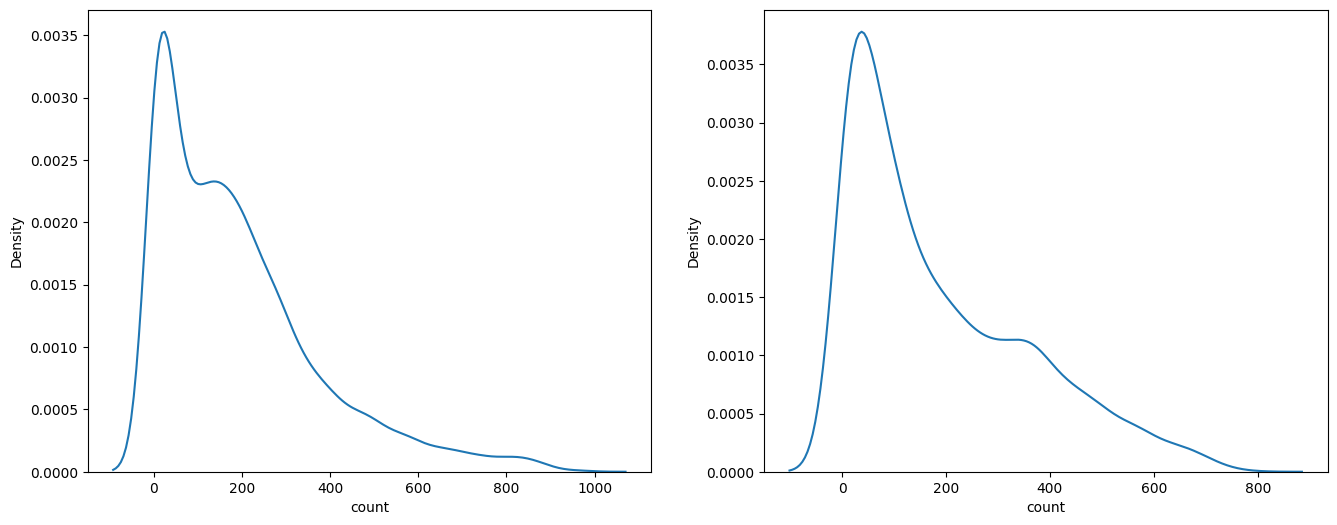

In [66]:
working_day = df.loc[df['workingday']==1,'count']
non_working_day = df.loc[df['workingday']==0,'count']

fig, ax = plt.subplots(1,2,figsize=(16,6))
working_day_plot = sns.kdeplot(working_day,ax=ax[0])
non_working_day_plot = sns.kdeplot(non_working_day,ax=ax[1])

In [67]:
alpha = 0.05
w1 = df[df['workingday']==0]['count'].values
w2 = df[df['workingday']==1]['count'].values
statistic,p_value = stats.ttest_ind(a=w1, b=w2)
print("p value =" , p_value)
if p_value <= alpha:
 print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning Working day has effect on the number of cycles being rented")
else:
 print("Since p-value is greater than the alpha 0.05, We cannot reject the Null Hypothesis. Meaning Working day has no effect on the number of cycles being rented.")

p value = 0.22644804226361348
Since p-value is greater than the alpha 0.05, We cannot reject the Null Hypothesis. Meaning Working day has no effect on the number of cycles being rented.


## Test - 3

Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

Here, we will use the ANOVA to test the hypothesis defined above

In [72]:
# defining the data groups for the ANOVA

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions


## Test - 4

Is weather dependent on season?

<ipython-input-83-c8a8b0f45f3a>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heavy_rain,ax=ax[1,1])


<Axes: xlabel='count', ylabel='Density'>

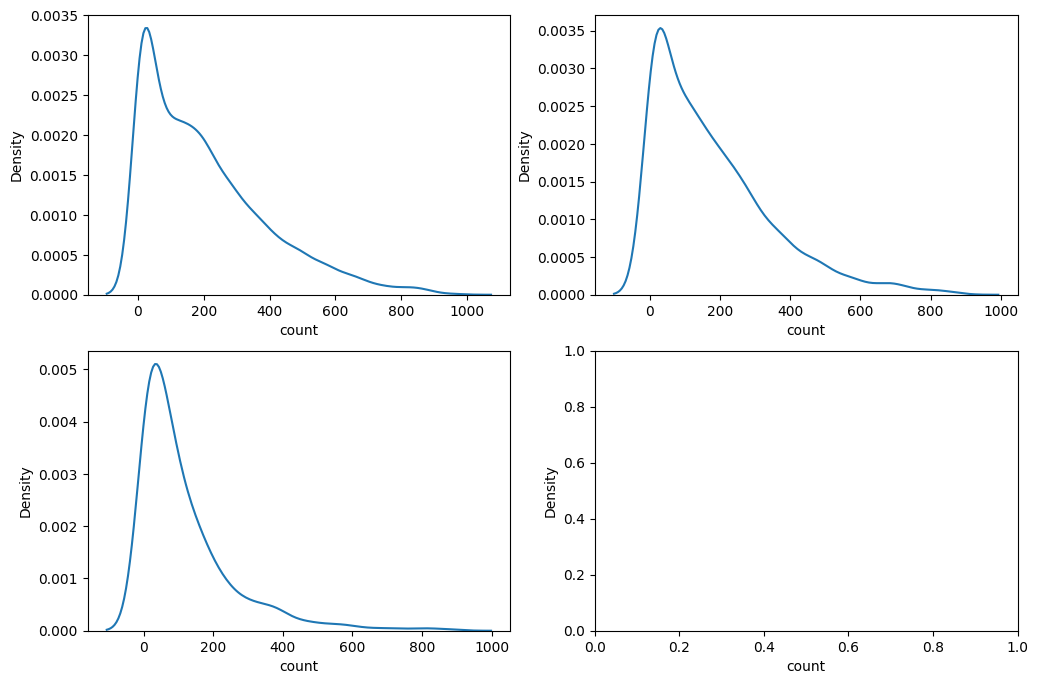

In [83]:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered  clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
clear = df.loc[df['weather']==1,'count']
mist = df.loc[df['weather']==2,'count']
light_rain = df.loc[df['weather']==3,'count']
heavy_rain = df.loc[df['weather']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(clear,ax=ax[0,0])
sns.kdeplot(mist,ax=ax[0,1])
sns.kdeplot(light_rain,ax=ax[1,0])
sns.kdeplot(heavy_rain,ax=ax[1,1])

It's a four-sided test with one categorical and one numirical column where the distribution is not normal.

We can use a non parametric method kruskals test here.


In [82]:
dt = pd.crosstab(index = df['weather'],columns = df['season'])
dt

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


1: Spring

2: Summer

3: Fall

4: Winter

**From the table:**

Most of the observations occur when the weather is clear or has few clouds (Spring) across all seasons.

The least number of observations are recorded when the weather conditions involve heavy rain, ice pallets, thunderstorms, and mist (winter).

Across seasons, there are variations in the number of observations, but Spring (clear weather) seems to dominate in all seasons, followed by Summer (mist/cloudy conditions).

Fall (light snow, light rain) tends to have lower counts compared to Spring and Summer.

Winter (heavy rain, ice pallets, etc.) is the rarest across all seasons.

# Insights



Insight based on univariate and bivariate -

* Temp, atemp and humidity looks like they follows the Normal Distribution.
* Humidity, casual, registered and count have outliers in the data.
* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10 and greater than 35, number of bikes rented is less.

General Insights -

* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.

# Recommendations



* In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temprature is less than 10 or in very cold days, company should have less bikes.

* Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented to reduce cost for company.

* We can arrange more vehicles during peak booking hours, so that customers can get vehicle they need. Also, during night company can work with less number of vehicles, which can reduce cost for company.

* We can hire more vehicles in Fall season as bookings are high.